In [147]:
import numpy as np
from sklearn.decomposition import PCA
import os
%matplotlib inline

import matplotlib.pyplot as plt

img_feat_file_name = 'full_orig_im_arr.npy'

cur_feat = img_feat_file_name[5:-4]

img_feat_load_dir = '/home/amanda/Documents/vgg_model/e_7800_feat/'
img_feat = np.load(img_feat_load_dir + img_feat_file_name)

x_train = img_feat[train_ind, :]
x_test = img_feat[test_ind, :]
y_train = train_df['success'].values
y_test = test_df['success'].values

In [149]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

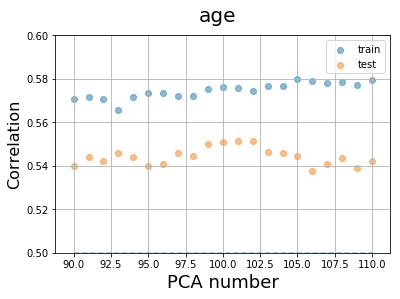

In [291]:
# visualize the performance change curves.
fig = plt.figure()
fig.suptitle(cur_feat, fontsize=20)
plt.scatter(performance_df['pca number'], performance_df['train acc'], label='train', alpha=0.5)
plt.scatter(performance_df['pca number'], performance_df['test acc'], label='test', alpha=0.5)
plt.xlabel('PCA number', fontsize=18)
plt.ylabel('Correlation', fontsize=16)
plt.ylim(0.5, 0.6)
plt.plot([x_start, x_end], [0.5, 0.5], linestyle='--', alpha=0.5)
plt.grid()
plt.legend()
fig.savefig(exp_dir + cur_feat + '_' + 'male_add_feat' + '.jpg')

In [429]:
df.shape

(7800, 26)

In [466]:

df_name = './tmp_data/merged_api_impression.csv'
df = pd.read_csv(df_name)
my_map = {'female': 0, 'male': 1}
df = df.applymap(lambda s: my_map.get(s) if s in my_map else s)
max_fund = df['total fund'].max()
df.loc[df['IPO'] == 1, 'total fund'] = max_fund + 0.1

In [467]:
df_with_fund = df[df['total fund'] != 0]
# f_ind = df_with_fund['gender'] == 'female'
# m_ind = df_with_fund['gender'] == 'male'

In [468]:
x = df_with_fund[['age', 'gender', 'trustworthy', 'intelligent', 'aggressive', 'attractive', 'responsible', 'sociable']].values

In [469]:
y = df_with_fund[['total fund']].values

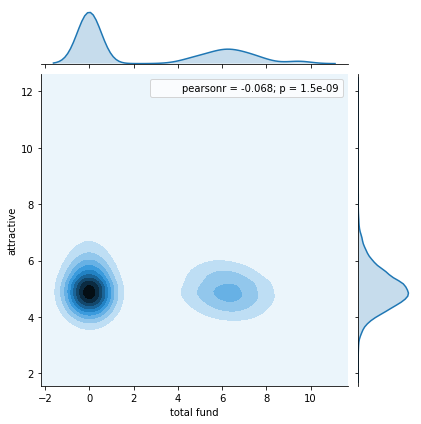

In [501]:
sns.jointplot(data=df, x='total fund', y='attractive', kind='kde')

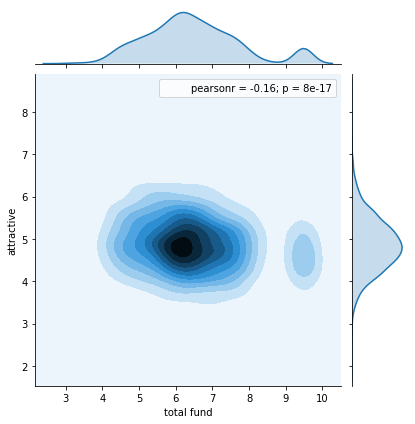

In [503]:
sns.jointplot(data=df_with_fund[df_with_fund['gender']==1], x='total fund', y='attractive', kind='kde')

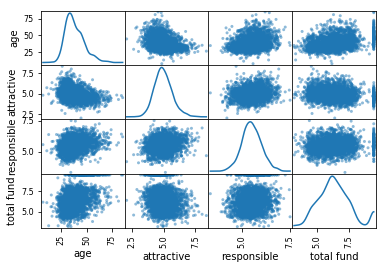

In [499]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
x = df_with_fund[['age', 'attractive', 'responsible','total fund']]
scatter_matrix(x, diagonal='kde')
plt.show()